In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score


%matplotlib inline

Будем работать с 1 датасетом

In [3]:
train_df = pd.read_csv("./1_train.csv")
X_train = train_df.drop("y", axis=1)
y_train = train_df["y"]
test_df = pd.read_csv("./1_test.csv")
X_test = test_df.drop("y", axis=1)
y_test = test_df["y"]

In [6]:
y_train

0        3
1       10
2       12
3       12
4        1
        ..
3886    11
3887    11
3888    10
3889    11
3890    11
Name: y, Length: 3891, dtype: int64

Определяем оптимальную высоту дерева принятия решений относительно точности (accuracy) классификации на проверочном множестве.

In [4]:
accuracy_history_list = np.zeros(12)
for t in range(1,11):
    tree = DecisionTreeClassifier(max_depth=t)
    tree.fit(X_train, y_train)
    accuracy_history_list[t] = accuracy_score(y_test, tree.predict(X_test))
max_score = max(accuracy_history_list) 
t = np.where(accuracy_history_list == max_score)[0][0]
print(f"tau = {t} \nmax score = {max_score}")

tau = 3 
max score = 0.9994859933179131


Ищем оптимальные критерий и сплиттер

In [5]:
tree_params = {'criterion': ["gini", "entropy"], 'splitter': ["best", "random"]}

In [6]:
tree = DecisionTreeClassifier(max_depth=3)
tree_grid = GridSearchCV(tree, tree_params, n_jobs=-1, verbose=True, cv=4)
tree_grid.fit(X_train, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']},
             verbose=True)

In [7]:
tree_grid.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [8]:
accuracy_score(y_test, tree_grid.predict(X_test))

0.9997429966589566

Повторим для всех датасетов

In [3]:
train_df = []
X_train = []
y_train = []
test_df = []
X_test = []
y_test = []
for i in range(1, 22):
    train_df.append(pd.read_csv(f"./{i}_train.csv"))
    X_train.append(train_df[i-1].drop("y", axis=1))
    y_train.append(train_df[i-1]["y"])
    test_df.append(pd.read_csv(f"./{i}_test.csv"))
    X_test.append(test_df[i-1].drop("y", axis=1))
    y_test.append(test_df[i-1]["y"])

In [4]:
for i in range(0, 21):
    accuracy_history_list = np.zeros(21)
    for t in range(1,12):
        tree = DecisionTreeClassifier(max_depth=t)
        tree.fit(X_train[i], y_train[i])
        accuracy_history_list[t] = accuracy_score(y_test[i], tree.predict(X_test[i]))
    max_score = max(accuracy_history_list) 
    t = np.where(accuracy_history_list == max_score)[0][0]
    print(f"Для {i+1}-го датасета: \ntau = {t} \nmax score = {max_score}")

Для 1-го датасета: 
tau = 3 
max score = 0.9994859933179131
Для 2-го датасета: 
tau = 9 
max score = 0.6442748091603053
Для 3-го датасета: 
tau = 1 
max score = 1.0
Для 4-го датасета: 
tau = 5 
max score = 0.9892173913043478
Для 5-го датасета: 
tau = 1 
max score = 0.9956709956709957
Для 6-го датасета: 
tau = 3 
max score = 0.9922737306843267
Для 7-го датасета: 
tau = 3 
max score = 0.9953488372093023
Для 8-го датасета: 
tau = 2 
max score = 0.997920997920998
Для 9-го датасета: 
tau = 4 
max score = 0.8137254901960784
Для 10-го датасета: 
tau = 4 
max score = 0.9935613682092556
Для 11-го датасета: 
tau = 1 
max score = 0.999195171026157
Для 12-го датасета: 
tau = 7 
max score = 0.8664047151277013
Для 13-го датасета: 
tau = 7 
max score = 0.6155963302752293
Для 14-го датасета: 
tau = 6 
max score = 0.9637205712080278
Для 15-го датасета: 
tau = 1 
max score = 1.0
Для 16-го датасета: 
tau = 1 
max score = 1.0
Для 17-го датасета: 
tau = 7 
max score = 0.8146286990508096
Для 18-го датасета:

Самое высокое - 21 датасет(11), самое низкое - 16 датасет(1)

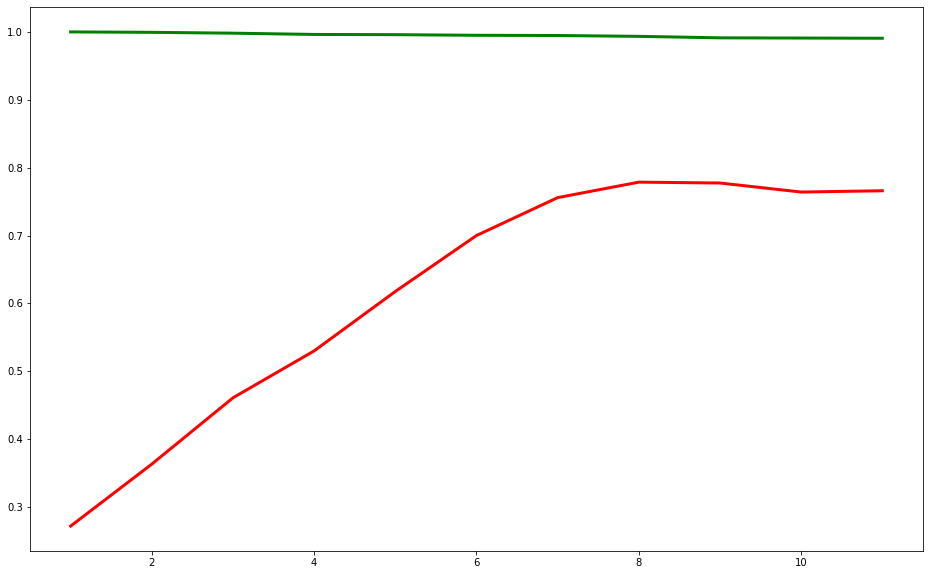

In [11]:
max_min = [20, 15]
accuracy_history_list = [np.zeros(13), np.zeros(13)]
for i in max_min:
    for t in range(1,12):
        tree = DecisionTreeClassifier(max_depth=t)
        tree.fit(X_train[i], y_train[i])
        accuracy_history_list[i//20][t] = accuracy_score(y_test[i], tree.predict(X_test[i]))
plt.figure(figsize=(16, 10))
plt.plot(range(1,12),accuracy_history_list[0][1:12], color="green", label="depth=1(16 set)", linewidth=3)
plt.plot(range(1,12),accuracy_history_list[1][1:12], color="red", label="depth=19(21 set)", linewidth=3)
plt.show()

Делаем лес

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
for i in range(0, 21):
    forest = RandomForestClassifier(n_estimators=100, n_jobs=-1)
    forest.fit(X_train[i], y_train[i])
    score_test = accuracy_score(y_test[i], forest.predict(X_test[i]))
    score_train = accuracy_score(y_train[i], forest.predict(X_train[i]))
    print(f"Для {i+1}-го датасета: \nscore_test = {score_test} \nscore_train = {score_train}")

Для 1-го датасета: 
score_test = 0.9992289899768697 
score_train = 1.0
Для 2-го датасета: 
score_test = 0.5480916030534351 
score_train = 1.0
Для 3-го датасета: 
score_test = 0.9995178399228544 
score_train = 1.0
Для 4-го датасета: 
score_test = 0.9245217391304348 
score_train = 1.0
Для 5-го датасета: 
score_test = 0.9978354978354979 
score_train = 1.0
Для 6-го датасета: 
score_test = 0.9939293598233996 
score_train = 1.0
Для 7-го датасета: 
score_test = 0.9609302325581396 
score_train = 1.0
Для 8-го датасета: 
score_test = 0.9708939708939709 
score_train = 1.0
Для 9-го датасета: 
score_test = 0.7784313725490196 
score_train = 1.0
Для 10-го датасета: 
score_test = 0.9979879275653923 
score_train = 1.0
Для 11-го датасета: 
score_test = 0.999195171026157 
score_train = 1.0
Для 12-го датасета: 
score_test = 0.9113106932360371 
score_train = 1.0
Для 13-го датасета: 
score_test = 0.4908256880733945 
score_train = 1.0
Для 14-го датасета: 
score_test = 0.9556155924353531 
score_train = 1.0
Дл

In [21]:
forest = RandomForestClassifier(n_estimators=100, criterion="gini", max_features=None)
forest.fit(X_train[1], y_train[1])

RandomForestClassifier(max_features=None)

In [20]:
accuracy = accuracy_score(y_test[1], forest.predict(X_test[1]))
print(accuracy)

0.7628498727735369
